# Grafy

- David Landa <david.landa@natur.cuni.cz>

Pro tvorbu grafů je základní knihovnou -- v prostředí jazyka Python -- matplotlib.
V následujících příkladech si ukážeme jak vytvářet základní grafy a popíšeme rozhraní knihovny.

## Co se naučíme

- Vytvoření graf s diskrétními hodnotami
- Vytvoření grafu se spojitými hodnotami
- Vytvoření skupiny grafů (subplot)
- Uložení grafu jako obrázek PNG/JPG

## Co by měl graf obsahovat

Každý graf by měl obsahovat:

- název
- popis os x, y případně 

In [7]:
# Import modulů, které budeme dále používat.

#%pylab inline

import numpy as np
import matplotlib.pyplot as plt


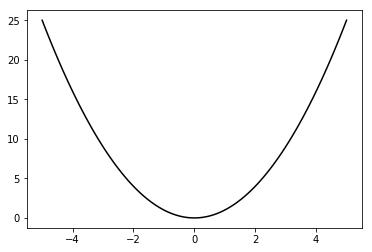

In [9]:
# Matlab LIKE API


x_values = np.linspace(-5, 5, 100)
y_values = x_values ** 2

plt.plot(x_values, y_values, color='black')



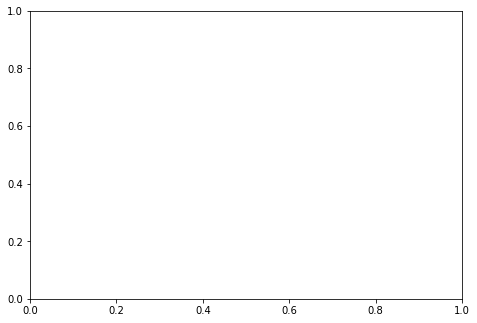

In [26]:

# Funkce `figure()` vrací instanci třídy `Figure`.

figure1 = plt.figure()
type(figure1)
axes = figure1.add_axes([0, 0, 1, 1]) 

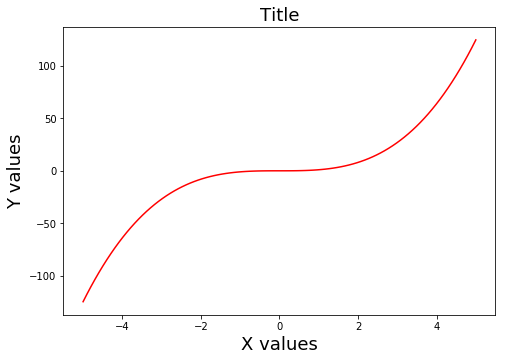

In [12]:
# Což není to samé jako zavolat přímo konstruktor Figure()?

figure = plt.figure()
figure.add_axes([0, 0, 1, 1])

figure.axes[0].set_title("Title", fontsize=18)
figure.axes[0].set_xlabel("X values", fontsize=18)
figure.axes[0].set_ylabel("Y values", fontsize=18)


# Generujeme hodnoty pro `f(x)`.
xx = np.linspace(-5, 5, 100)
yy = xx ** 3

figure.axes[0].plot(xx, yy, "r")


### Graf s osami na středu

Pokud chceme vykreslit graf s osami na středu namísto na krajích, musíme je tam explicitně přemístit a vypnout zobrazování okrajů.

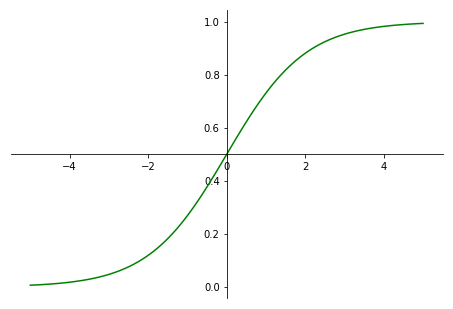

In [38]:
figure = plt.figure()

ax = figure.add_axes([0, 0, 1, 1])

def sigmoid(xx):
    return [(1/(1 + math.exp(-x))) for x in xx]

xx = np.linspace(-5, 5, 100)
yy = sigmoid(xx)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Nezobrazuj horní a pravou osu.

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

figure.axes[0].plot(xx, yy, "g")


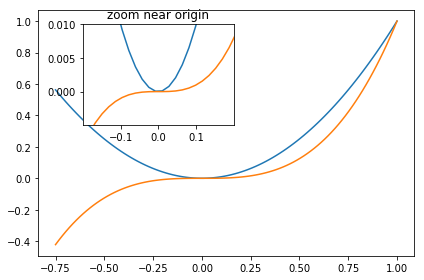

In [22]:
xx = np.linspace(-0.75, 1., 100)

fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

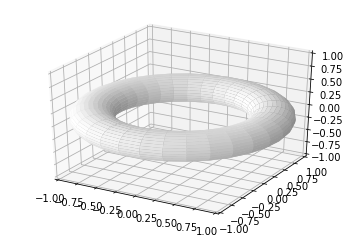

In [33]:
# Vykreslení parametrické křivky

from mpl_toolkits.mplot3d import Axes3D

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.

X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = 'white', rstride = 1, cstride = 1)
plt.show()

# A torus is a surface that can be parameterized with two parameters, 
# theta and phi, varying from 0 to 2 * pi, as shown in the following code:
